In [ ]:
!pip install torch==2.2.2 torchvision==0.17.2 --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers==0.26.3
!pip install transformers==4.37.2
!pip install accelerate==0.27.2
!pip install opencv-python pillow


In [ ]:
!pip install huggingface_hub==0.19.4


In [ ]:
!pip install xformers

In [ ]:
import cv2
import numpy as np
from PIL import Image
import torch

from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image

# Function to apply Canny edge detection to the input image
def apply_canny(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))
    edges = cv2.Canny(image, 100, 200)
    edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(edges_rgb)

# Load the controlnet model (Canny variant)
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
)

# Load the full pipeline with base Stable Diffusion + ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
).to("cpu")

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()

# Load and preprocess image
image_path = "/content/input test.JPG"  # Replace with your image path
control_image = apply_canny(image_path)

# Style prompt
prompt = "a beautiful painting in the style of Vincent Van Gogh"

# Generate stylized image
output = pipe(prompt, image=control_image, num_inference_steps=30).images[0]

# Save the output
output.save("stylized_output.png")
print("✅ Stylized image saved as 'stylized_output.png'")


In [ ]:
import cv2
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt




# Function to apply Canny edge detection to the input image
image_path = "/content/input test.JPG"  # Replace with your image path
input=cv2.imread(image_path)


control_image = apply_canny(image_path)

In [ ]:
# Function to apply Canny edge detection to the input image
def apply_canny(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))
    edges = cv2.Canny(image, 100, 200)
    edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(edges_rgb)



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

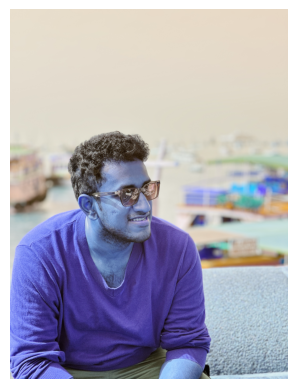

In [ ]:
plt.imshow(input)
plt.show
plt.axis('off')


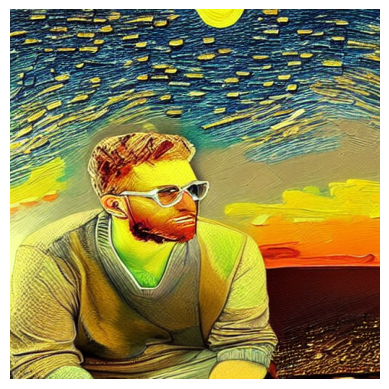

In [ ]:
plt.imshow(output)


